In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from sympy import Matrix

Problem 1:
===

The first part of this project is to find the singular value decomposition step by step. So first I will get A.A<sup>T</sup> and A<sup>T</sup>.A and compare dimensions. Following this, I will find eigenvalues to get S. Next, I can get the eigenvectors, normalize, and then I can find U.


Part a:
---

Find A.A<sup>T</sup> and A<sup>T</sup>.A and find the dimensions

In [2]:
A = np.array([[-4, 1], [-3, 2], [7, -4], [-4, -9], [7, 6], [-3,9],
            [-8, 7], [2, 3], [9, -9], [8, 7], [-4, -4], [-7, -7], [7, 9],
            [-2, 4], [-5, -5], [5, -4], [7, -9], [-2, 6], [-1, 3], [1, 6]])
row, col = A.shape

M1 = np.dot(A, A.T)
M2 = np.dot(A.T, A)

row1, col1 = M1.shape
row2, col2 = M2.shape

print("A.A^T has", row1, "rows, and", col1, "columns")
print("A^T.A has", row2, "rows, and", col2, "columns")

A.A^T has 20 rows, and 20 columns
A^T.A has 2 rows, and 2 columns


Part b:
---

Now, I want to get the eigenvalues of M1 and M2. This can easily be done with the np.linalg.eig function

In [3]:
evals1, evecs1 = np.linalg.eig(M1)
evals2, evecs2 = np.linalg.eig(M2)

# Round and convert to real and round to clean up
evals1 = np.round(np.real(evals1), decimals=8)
evals2 = np.round(np.real(evals2), decimals=8)

# Taking sqrt of my eigenvalues
svds = np.diag(evals2 ** .5)

# Getting S, and putting the values on its diagonal
S = np.zeros((20, 2))
S[:svds.shape[0],:svds.shape[1]] = svds
S

array([[24.15719627,  0.        ],
       [ 0.        , 27.79262255],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

Part c:
---

Now, I want to get the symbolic eigenvalues. First I will use sympy's Matrix to get the characteristic polynomial. Then, I can solve these for x

In [4]:

qq = Matrix(M1)
qq.charpoly('x')

PurePoly(x**20 - 1356*x**19 + 450767*x**18, x, domain='ZZ')

In [5]:
x = sp.symbols('x')

# getting an equation
eq1 = sp.Eq(x**20 - 1356*x**19 + 450767*x**18, 0)
xs = sp.solve(eq1)  
xs[1]

678 - sqrt(8917)

In [6]:
xs[2]

sqrt(8917) + 678

Part d:
---

My eigenvectors of M2. numpy already normalizes them for me. I use them to make V

In [7]:
v1 = evecs2[:, 0]
v2 = evecs2[:, 1]

V = np.array([v1, v2])
print("Our V is:")
print(V)

Our V is:
[[-0.99886129 -0.04770874]
 [ 0.04770874 -0.99886129]]


Part e:
---

First, I want to find u1 = A.v1 and u2 = A.v2. Then, I want to ensure that they are perpendicular, by taking a dot product and ensuring that is 0. Lastly, I ned to normalize them. To complete U, I want to pad it with the eigenvectors that have eigenvalue 0

In [8]:
u1 = np.dot(A, v1)
u2 = np.dot(A, v2)

print("We can see if these are eigenvectors of M1 by dotting and dividing by u1 or u2. \
 This will give us the the eigenvalues. If the vector is all the same, that means it has \
a uniform eigenvalue, and is a valid eigenvector")
print(np.dot(M1, u1)/u1)
print()
print(np.dot(M1, u2)/u2)

We can see if these are eigenvectors of M1 by dotting and dividing by u1 or u2.  This will give us the the eigenvalues. If the vector is all the same, that means it has a uniform eigenvalue, and is a valid eigenvector
[583.57013184 583.57013184 583.57013184 583.57013184 583.57013184
 583.57013184 583.57013184 583.57013184 583.57013184 583.57013184
 583.57013184 583.57013184 583.57013184 583.57013184 583.57013184
 583.57013184 583.57013184 583.57013184 583.57013184 583.57013184]

[772.42986816 772.42986816 772.42986816 772.42986816 772.42986816
 772.42986816 772.42986816 772.42986816 772.42986816 772.42986816
 772.42986816 772.42986816 772.42986816 772.42986816 772.42986816
 772.42986816 772.42986816 772.42986816 772.42986816 772.42986816]


In [9]:
print("To ensure they are perpendicular, take the dot. If 0, they are perpendicular")
print(np.round(np.dot(u1, u2), decimals=12))
print()

# We can see u1 and u2 are eigenvectors. Now I want to normalize them

def normalize(vector):
    return vector/np.linalg.norm(vector)

u1 = normalize(u1)
u2 = normalize(u2)

print("Like stated above, if I was to complete U I would append eigenvectors with eigenvalue 0")



To ensure they are perpendicular, take the dot. If 0, they are perpendicular
0.0

Like stated above, if I was to complete U I would append eigenvectors with eigenvalue 0


Problem 2:
===

Here I just give the list of singular values, which is just the sqrt of the eigenvalues. I have this above as svds, I just need the diagonal

In [10]:
print("My singular values are: ")
print(np.diag(svds))

My singular values are: 
[24.15719627 27.79262255]


Problem 3:
===

Now I want to plot my v1, v2 in the plane. I do this using pyplot quiver

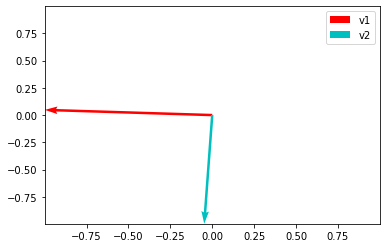

In [11]:
plt.figure()

# Plotting my two vectors
plt.quiver(0, 0, V[0, 0], V[1, 0], color='r', label='v1', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, V[0, 1], V[1, 1], color='c', label='v2', angles='xy', scale_units='xy', scale=1)

# General graphing stuff. I do the min here since they both point negative
plt.xlim(np.amin(V), -1 * np.amin(V))
plt.ylim(np.amin(V), -1 * np.amin(V))
plt.legend()
plt.show()

Problem 4:
===

Now, to plot using polar coordinates. My theta will just be from 0 to 2pi, my r will be (A.v).(A.v), where v is `[cos(theta), sin(theta)]`.

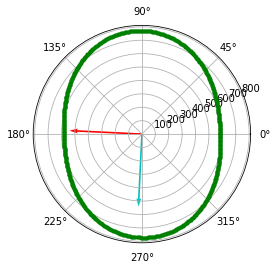

In [12]:
plt.figure()

rads = np.arange(0, (2 * np.pi), 0.01)

for rad in rads:
    v = np.array([math.cos(rad), math.sin(rad)])
    plt.polar(rad, np.dot(np.dot(A, v), np.dot(A, v)), 'g.')

plt.quiver(0, 0, V[0, 0], V[1, 0], color='r', scale=3)
plt.quiver(0, 0, V[0, 1], V[1, 1], color='c', scale=3)

plt.show()

Problem 5 and 6:
===

The maximum length of A.v, or the stretch will just be our first eigenvalue, and the minimum, or squeeze, will be the second eigenvalue. But we can check with a quick loop

In [13]:
max = evals2[1]
min = evals2[0]

rads = np.arange(0, (2 * np.pi), 0.01)

for rad in rads:
    v = np.array([math.cos(rad), math.sin(rad)])
    temp = np.dot(np.dot(A, v), np.dot(A, v))
    if temp > max:
        max = temp
    elif temp < min:
        min = temp
print("My max, or stretch, is:", max)
print("My min, or squeeze, is:", min)

My max, or stretch, is: 772.42986816
My min, or squeeze, is: 583.57013184


Problem 7
===

Changing to a new problem, I want take a matrix B, and find the SVD of it. Then, I want to compare the SVD to the original B

Part a:
---

Use np.linalg.svd to get the singular value decomposition

In [14]:
B = np.array([[0.23, 0.6, 0.74, 0.72, 0.04, 0.91, 0.3, 0.43, 0.65, 0.19], 
            [0.78, 0.13, 0.63, 0.15, 0.08, 0.17, 0.25, 0.22, 0.72, 0.51],
            [0.5, 0.67, 0.18, 0.79, 0.36, 0.55, 0.6, 0.72, 0.14, 0.84],
            [0.39, 0.61, 0.43, 0.36, 0.99, 0.67, 0.3, 0.61, 0.93, 0.5],
            [0.7, 0.94, 0.65, 0.63, 0.97, 0.3, 0.17, 0.86, 0.76, 0.76],
            [0.24, 0.03, 0.46, 0.5, 0.51, 0.33, 0.86, 0.29, 0.57, 0.75],
            [0.51, 0.31, 0.86, 0.08, 0.27, 0.11, 0.22, 0.9, 0.68, 0.05],
            [0.21, 0.83, 0.17, 0.61, 0.29, 0.26, 0.77, 0.45, 0.81, 0.95],
            [0.1, 0.37, 0.16, 0.97, 0.49, 0.79, 0.82, 0.34, 0.26, 0.38],
            [0.72, 0.76, 0.22, 0.38, 0.27, 0.43, 0.36, 0.39, 0.19, 0.76]])

V, svds, U = np.linalg.svd(B)

# This will get the first 2 columns of V, dot it with the 2x2 matrix
# of diagonals. Then get the first 2 columns of U
Bnew = np.dot(np.dot(V[:, 0:2], np.diag(svds[0:2])), U.T[:, 0:2].T)
Bnew

array([[ 0.41264985,  0.52776526,  0.41973051,  0.49857305,  0.43960698,
         0.42656182,  0.42551425,  0.50989495,  0.5502858 ,  0.55093132],
       [ 0.46581807,  0.37611952,  0.54986738,  0.15771735,  0.36298145,
         0.19051408,  0.10632383,  0.50293888,  0.59679677,  0.29409875],
       [ 0.31147476,  0.61606342,  0.24143769,  0.77783228,  0.46390733,
         0.61040275,  0.6918834 ,  0.45688636,  0.43953931,  0.74076165],
       [ 0.57862301,  0.6300898 ,  0.62662357,  0.49632497,  0.54971237,
         0.45245873,  0.40943816,  0.67861256,  0.75940836,  0.60842541],
       [ 0.71194428,  0.73473057,  0.78504207,  0.53591745,  0.65177585,
         0.5030003 ,  0.43474697,  0.82156318,  0.92988287,  0.68810973],
       [ 0.30825536,  0.50871124,  0.27390988,  0.58354613,  0.39784148,
         0.47029951,  0.51277433,  0.4187606 ,  0.42378219,  0.58238755],
       [ 0.60032719,  0.398093  ,  0.73864517,  0.04347928,  0.41523144,
         0.13074509, -0.01049634,  0.6195103 

Part b:
---

Now, get the rank of Bnew using `numpy.matrix_rank`

In [15]:
rank = np.linalg.matrix_rank(Bnew)

print("The rank of the matrix is", rank)

The rank of the matrix is 2


Part c:
---

I find Bprime, which is B - Bnew, and get the svd of this. Then, I can compare these values to B's svd

In [16]:
Bprime = B - Bnew

V, svds1, U = np.linalg.svd(Bprime)
print(svds)
print()
print(np.round(svds1, decimals=8))

# The singular values are nearly identical. My Bprime is missing the first two, and those are zeros at the end.
# You can see the first value of Bprime is the 3rd of B, 2nd to 4th, etc. 


[5.04282981 1.5072937  1.08938674 0.96787892 0.89255825 0.65286199
 0.59124593 0.32225928 0.19364291 0.15959561]

[1.08938674 0.96787892 0.89255825 0.65286199 0.59124593 0.32225928
 0.19364291 0.15959561 0.         0.        ]


Problem 8
===

Now, I have a list of nutritional data and I want to project this data into 2 dimensions such that I can plot it. I can use SVD to reduce the data points. Lastly, I can seperate the data into 2 lists based on the plot

<Figure size 432x288 with 0 Axes>

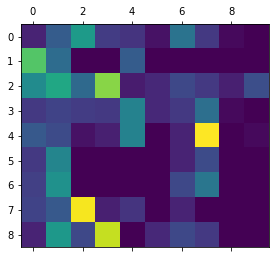

In [17]:
P = np.array([[0.08, 0.23, 0.43, 0.14, 0.12, 0.04, 0.3, 0.13, 0.02, 0.],
              [0.58, 0.28, 0., 0., 0.23, 0., 0., 0., 0., 0.],
              [0.38, 0.47, 0.27, 0.65, 0.06, 0.09, 0.17, 0.13, 0.07, 0.19],
              [0.13, 0.16, 0.14, 0.13, 0.35, 0.09, 0.13, 0.29, 0.02, 0.],
              [0.22, 0.18, 0.04, 0.07, 0.35, 0., 0.08, 0.79, 0., 0.02], 
              [0.13, 0.36, 0., 0., 0., 0., 0.08, 0.18, 0., 0.], 
              [0.15, 0.4, 0., 0., 0., 0., 0.17, 0.31, 0., 0.],
              [0.16, 0.22, 0.78, 0.07, 0.12, 0., 0.08, 0., 0., 0.], 
              [0.08, 0.42, 0.17, 0.72, 0., 0.09, 0.17, 0.13, 0., 0.]])

# Lets visualize with an array plot. The lighter the value, the higher the number
plt.figure()
plt.matshow(P)
plt.show()

<Figure size 432x288 with 0 Axes>

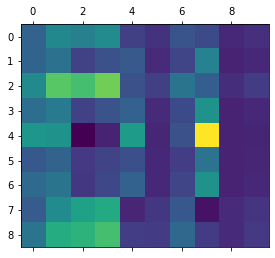

In [18]:
pU, psvds, pV = np.linalg.svd(P)

# This will get the first 2 columns of V, dot it with the 2x2 matrix
# of diagonals. Then get the first 2 columns of U
Pnew = np.dot(np.dot(pU[:, 0:2], np.diag(psvds[0:2])), pV.T[:, 0:2].T)

plt.figure()
plt.matshow(Pnew)
plt.show()

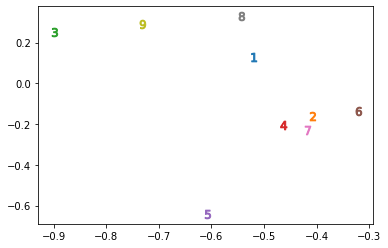

In [19]:
# To get the points to plot, I want ot use the first two eigenvectors of V to project P into 2 dimensions
projection = np.dot(P, pV.T[:, 0:2])

plt.figure()
for i in range(0, 9):
    plt.scatter(projection[i, 0], projection[i, 1], s=75, marker='$' + str(i + 1) + '$')
plt.show()

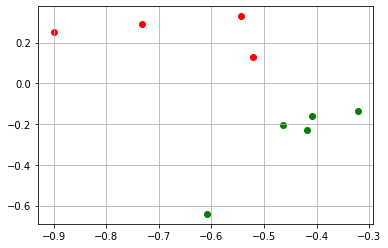

In [20]:
# Lastly, I want to break this up into 2 clusters. My top cluster is 3, 9, 8, and 1. My bottom cluster is everything else
# I want to make another picture showing them seperated by color
set1 = np.array([projection[0], projection[2], projection[7], projection[8]])
set2 = np.array([projection[1], projection[3], projection[4], projection[5], projection[6]])

plt.figure()

plt.scatter(set1[:,0], set1[:,1], color='r')
plt.scatter(set2[:,0], set2[:,1], color='g')

plt.grid(which='major')
plt.show()



Problem 9
===

The last example we want to tackle is looking at data connected through a tree. I want to try and find the most effiecent path through a tree of data

<Figure size 432x288 with 0 Axes>

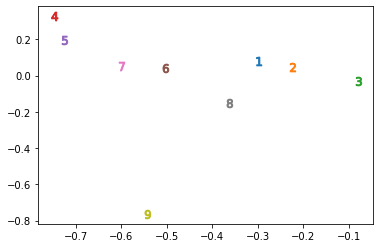

In [21]:
R = np.array([[0.03, 0.27, 0.05, 0.2], [0.04, 0.03, 0.05, 0.29], [0.06, 0.03, 0.05, 0.03],
[0.07, 0.16, 0.97, 0.34], [0.07, 0.46, 0.1, 0.68], [0.14, 0.25, 0.05, 0.49],
[0.16, 0.74, 0.1, 0.15], [0.27, 0.29, 0.05, 0.13], [0.93, 0.04, 0.15, 0.15]])

rU, rsvds, rV = np.linalg.svd(R)

Rprojection = np.dot(R, rV.T[:, 0:2])

plt.figure()

plt.figure()
for i in range(0, 9):
    plt.scatter(Rprojection[i, 0], Rprojection[i, 1], s=75, marker='$' + str(i + 1) + '$')
plt.show()


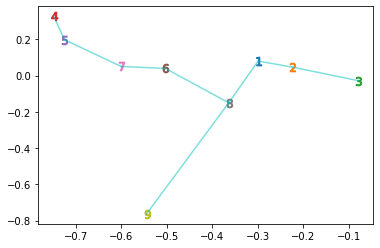

In [22]:
# I think the minimum tree would be roughly in a "Y" shape. 
# So 9 connected to 8, where it then forks and connects the two arms. 

plt.figure()

for i in range(0, 9):
    plt.scatter(Rprojection[i, 0], Rprojection[i, 1], s=75, marker='$' + str(i + 1) + '$')

# Now plot the connecting lines
order = [3, 4, 6, 5, 7, 0, 1, 2]
for i in range(0, 7):
    plt.plot([Rprojection[order[i], 0], Rprojection[order[i + 1], 0]],
           [Rprojection[order[i], 1], Rprojection[order[i + 1], 1]], color='c', alpha=.5)

plt.plot([Rprojection[7, 0], Rprojection[8, 0]],
           [Rprojection[7, 1], Rprojection[8, 1]], color='c', alpha=.5)
plt.show()